# Graph Classification
In this notebook we give an example of graph classification task. We generate graphs based on following types:
- cycle,
- star,
- wheel,
- complete,
- lollipop,
- hypercube,
- circular ladder,
- grid.

With number of nodes between $[10, 20]$. Next we train A deep Graph Convolution Network (GCN) for graph classification.
Finally, we visualize the results plotting the cost/score curves. In our case we use Categorical Cross Entropy as cost
and Accuracy score.

In [1]:
import tensorflow as tf
from algomorphism.models import GCNwithDepth
from algomorphism.datasets.generated_data import SimpleGraphsDataset
from algomorphism.methods.graphs import a2g
import networkx as nx
import matplotlib.pyplot as plt
from algomorphism.figures.nn import multiple_models_history_figure

In [2]:
for gpu in tf.config.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


2021-10-26 09:12:56.927630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 09:12:56.936737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-26 09:12:56.937330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Generate graph dataset

In [ ]:
examples = 500
n_nodes_min = 10
n_nodes_max = 20
graph_types = ['cycle', 'star', 'wheel', 'complete', 'lollipop',
                'hypercube', 'circular_ladder', 'grid']

g_dataset = SimpleGraphsDataset(examples, n_nodes_min, n_nodes_max, graph_types)
g_dataset.generate_dataset()
a_train, _, _ , y_train = g_dataset.get_train_data()

## So graph examples

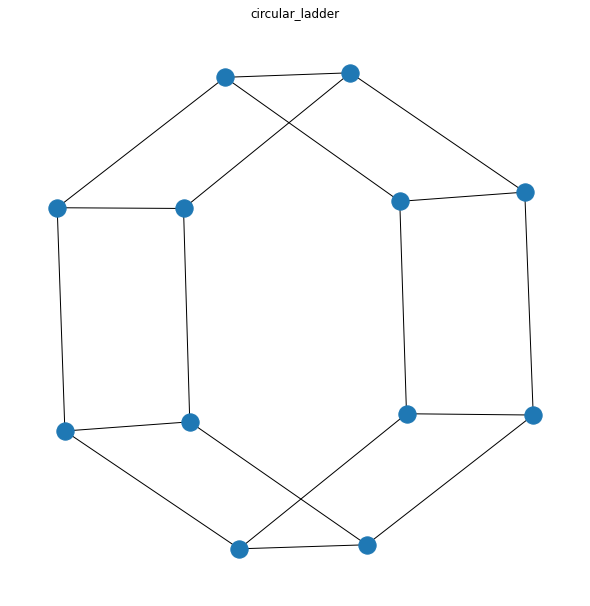

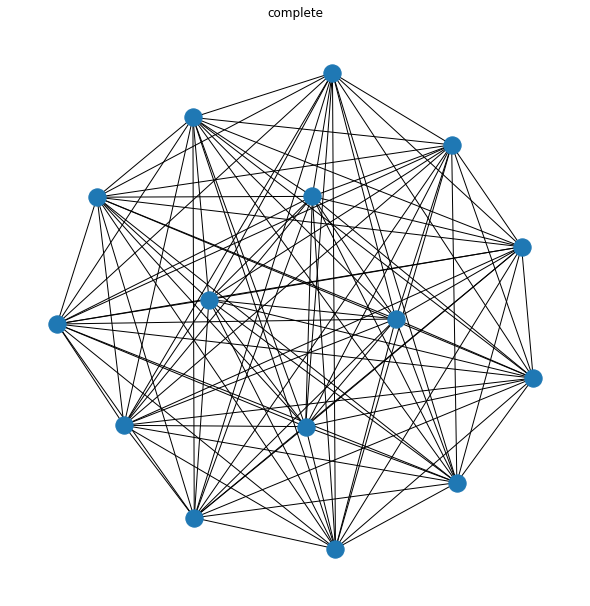

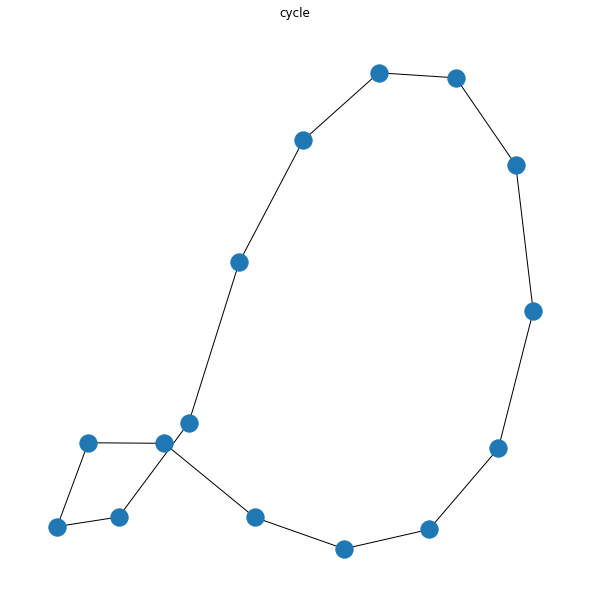

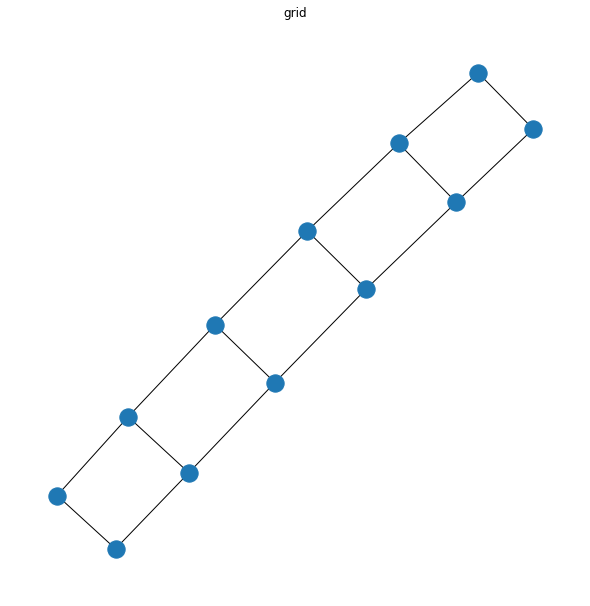

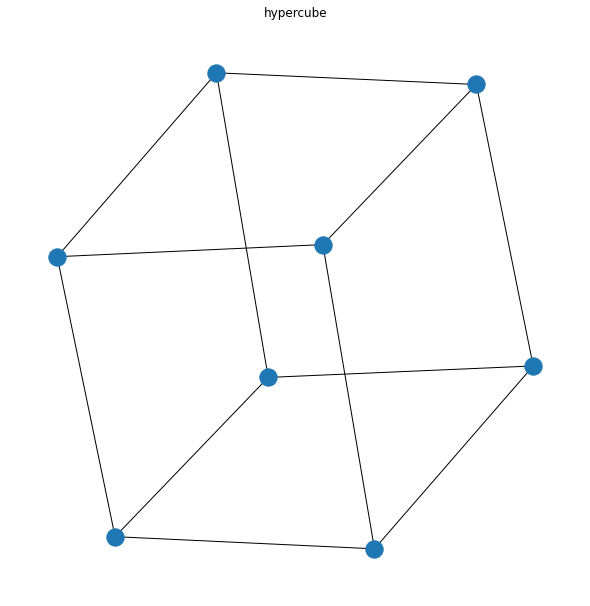

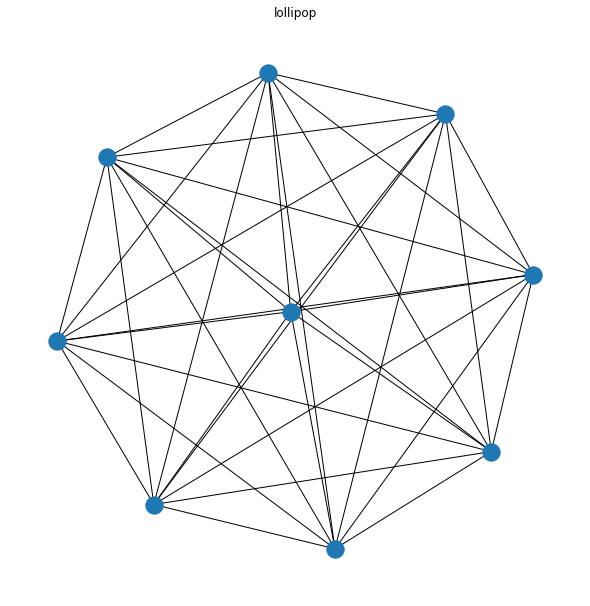

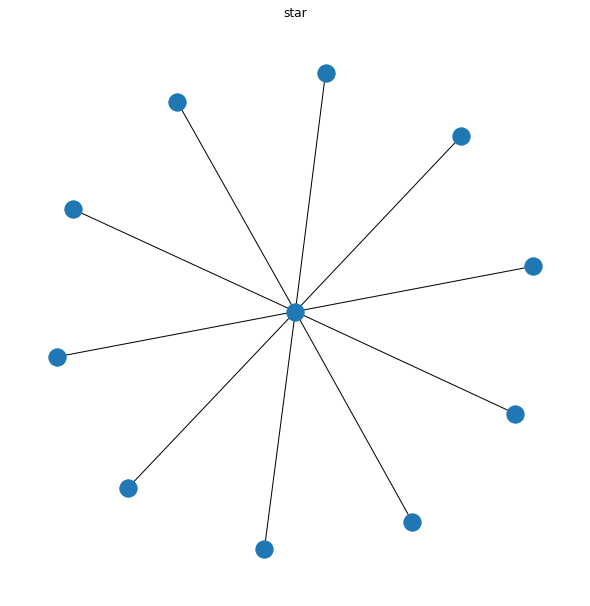

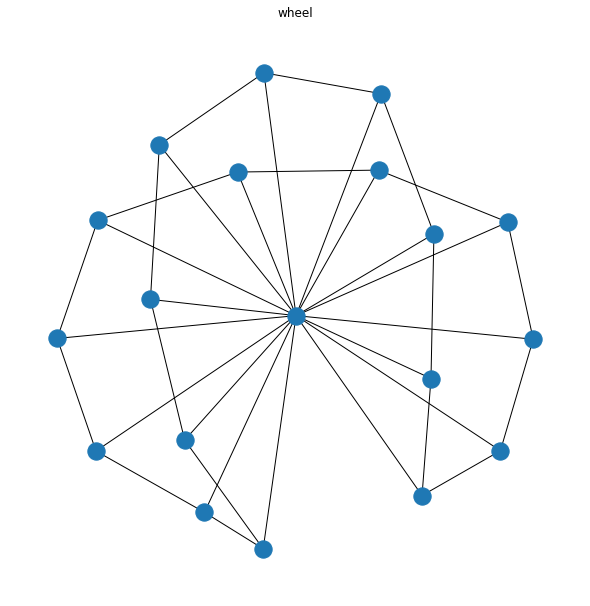

In [4]:
c = 0
c_max = y_train.shape[1]
for i in range(a_train.shape[0]):
    if c == tf.argmax(y_train[i]):
        c+=1
        g = a2g(a_train[i])
        plt.figure(figsize=(8,8))
        nx.draw(g)
        class_name = g_dataset.get_class_names_by_one_hot_vectors(y_train[i].reshape(1, -1))[0]
        plt.title(class_name)
    elif c == c_max:
        break

## Initialize & train GCN

In [5]:
input_shape = a_train.shape[1]
depth_gcn = 4

gcn = GCNwithDepth(g_dataset, input_shape,len(graph_types),depth_gcn, learning_rate=1e-3, clip_norm=1e-0)

In [6]:
gcn.train(g_dataset, epochs=150, print_types=['train', 'val'])

2021-10-26 09:13:00.224570: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 1 finished
train cost: 2.14341139793396
train score: 0.11500000208616257
val cost: 2.195756435394287
val score: 0.10000000149011612
Epoch 2 finished
train cost: 2.131514310836792
train score: 0.11500000208616257
val cost: 2.183197259902954
val score: 0.10000000149011612
Epoch 3 finished
train cost: 2.1157617568969727
train score: 0.12250000238418579
val cost: 2.1665425300598145
val score: 0.14000000059604645
Epoch 4 finished
train cost: 2.0989632606506348
train score: 0.1274999976158142
val cost: 2.1485049724578857
val score: 0.11999999731779099
Epoch 5 finished
train cost: 2.0838582515716553
train score: 0.1525000035762787
val cost: 2.1319549083709717
val score: 0.11999999731779099
Epoch 6 finished
train cost: 2.071742296218872
train score: 0.1550000011920929
val cost: 2.1177515983581543
val score: 0.11999999731779099
Epoch 7 finished
train cost: 2.064539670944214
train score: 0.15000000596046448
val cost: 2.1071882247924805
val score: 0.05999999865889549
Epoch 8 finished
train 

## Plot history

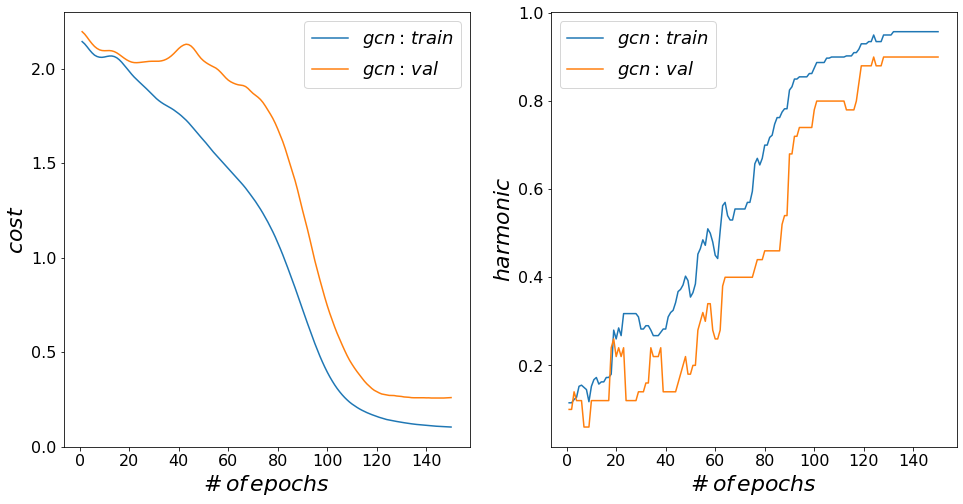

In [7]:
multiple_models_history_figure([gcn])

In [8]:
# Test accuracy
print(gcn.score_mtr.metric_dataset(g_dataset.test))
# Test cce
print(gcn.cost_mtr.metric_dataset(g_dataset.test))

tf.Tensor(0.92, shape=(), dtype=float32)
tf.Tensor(0.16280502, shape=(), dtype=float32)


## References
- Semi-Supervised Classification with Graph Convolutional Networks, [https://arxiv.org/pdf/1609.02907.pdf](https://arxiv.org/pdf/1609.02907.pdf)
